# Week2

## Lattice Plotting System

### Simple Lattice Plot

In [87]:
options(warn=-1)

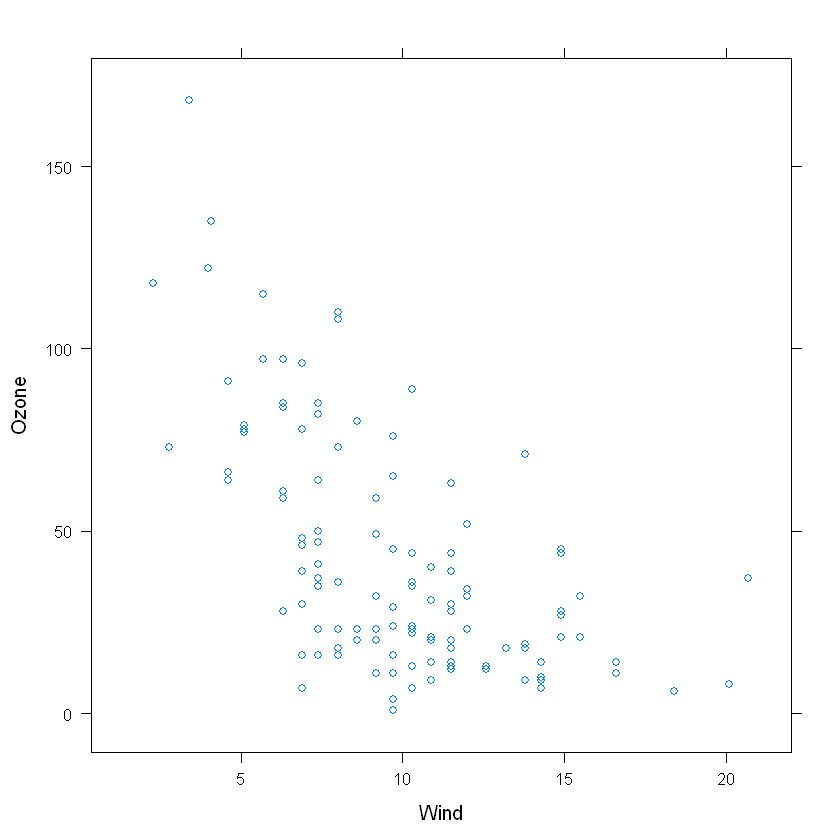

In [1]:
library(lattice)
library(datasets)
#Simple scatterplot
xyplot(Ozone~Wind,data=airquality)

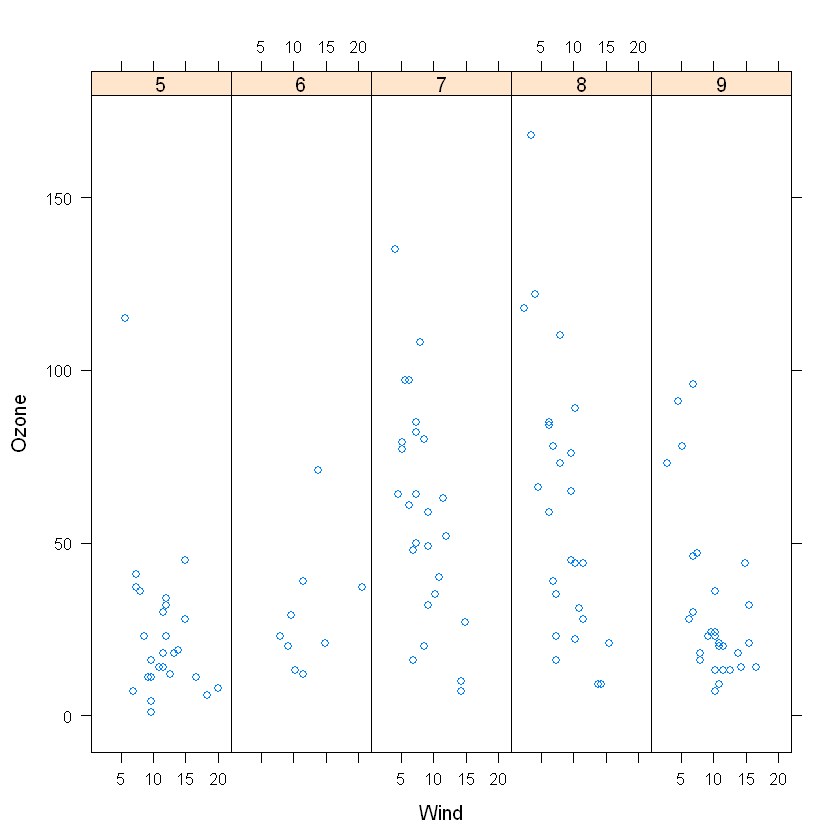

In [2]:
library(lattice)
library(datasets)
#Convert 'Month' to a factor variable
airquality <- transform(airquality,Month=factor(Month))
xyplot(Ozone~Wind|Month,data=airquality,layout=c(5,1))

### Lattice Behaviour

In [3]:
p <- xyplot(Ozone~Wind|Month,data=airquality,layout=c(5,1))

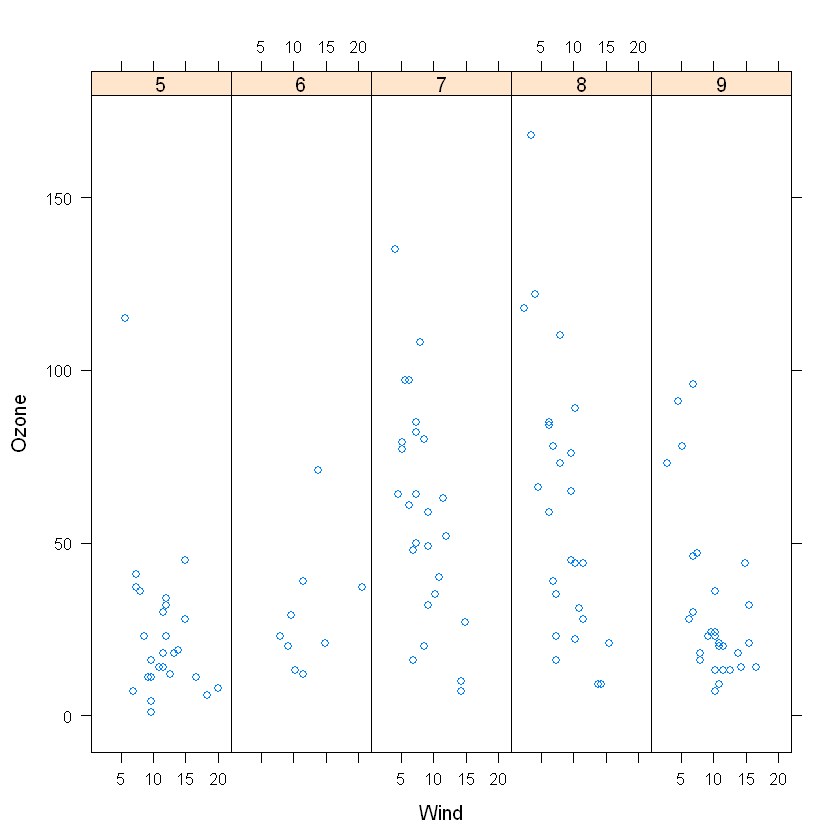

In [4]:
print(p)

### Lattice Panel Functions

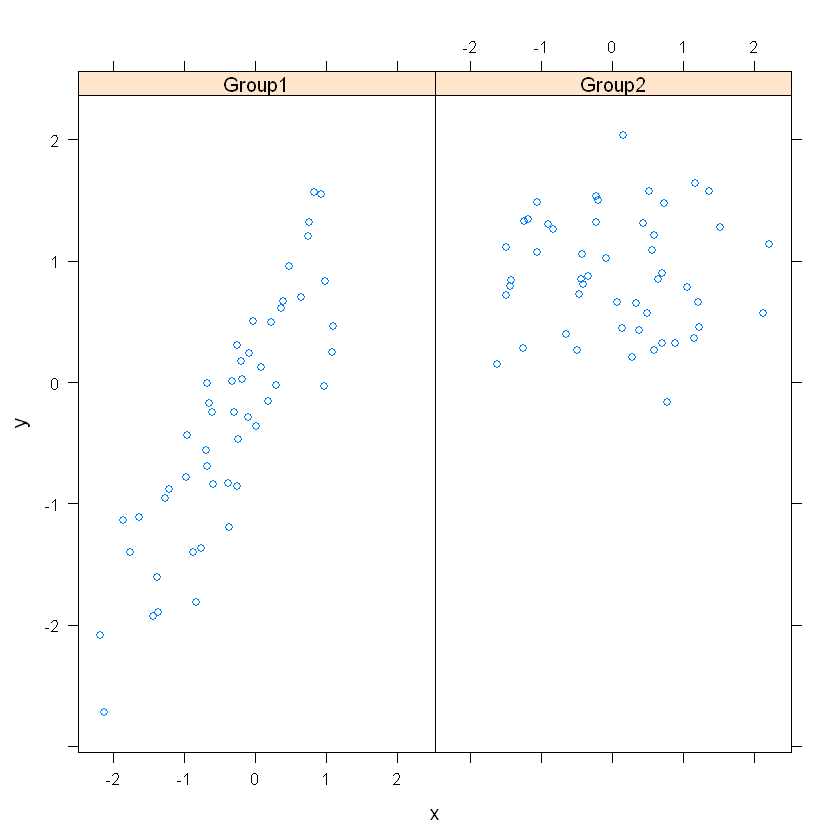

In [5]:
set.seed(10)
x<-rnorm(100)
f <- rep(0:1,each=50)
y <- x+f-f*x+rnorm(100,sd=0.5)
f <- factor(f,labels=c("Group1","Group2"))
xyplot(y~x|f,layout = c(2,1))##Plot with 2 panels

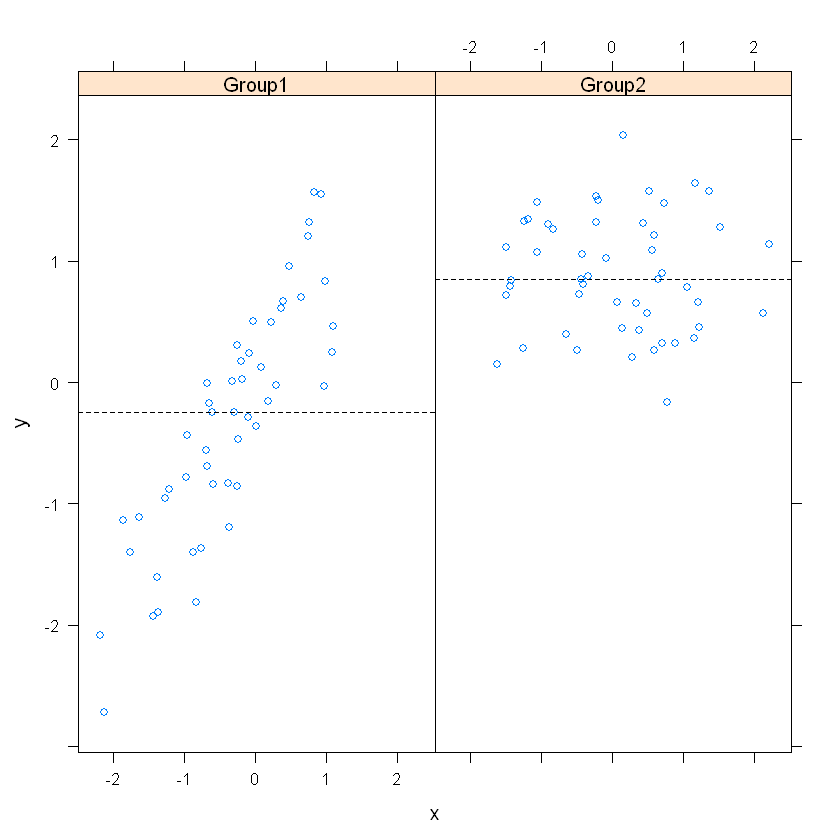

In [6]:
xyplot(y~x|f,panel=function(x, y, ...){
    panel.xyplot(x,y, ...)
    panel.abline(h=median(y),lty = 2)
})

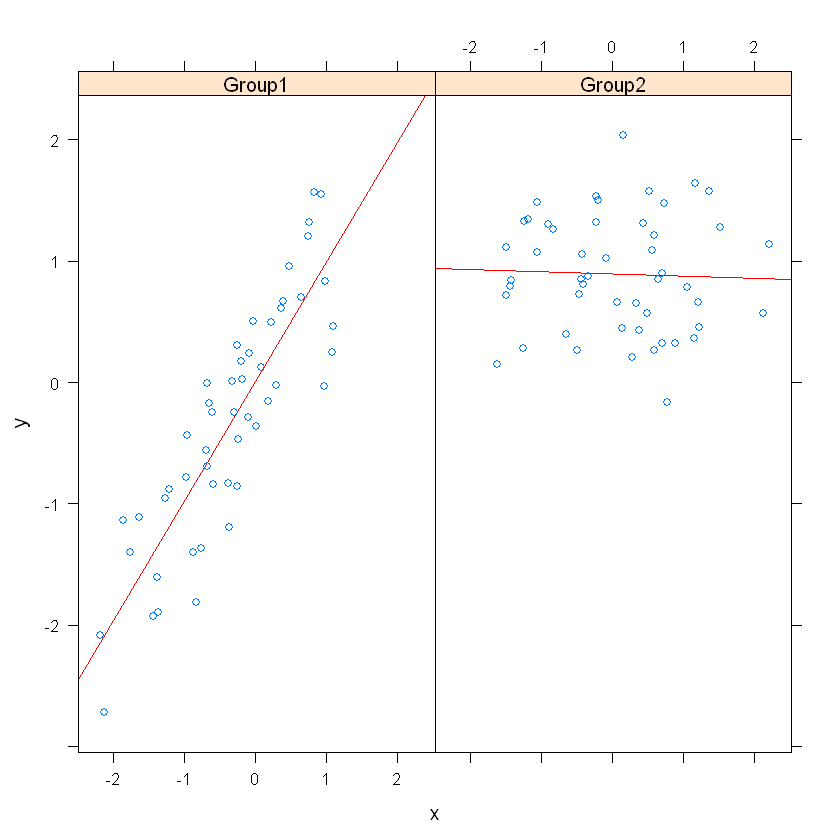

In [7]:
xyplot(y~x|f,panel=function(x, y, ...){
    panel.xyplot(x,y, ...)
    panel.lmline(x,y,col= 2)
})

## ggplot2

### qplot

In [8]:
library(ggplot2)
str(mpg)

Classes 'tbl_df', 'tbl' and 'data.frame':	234 obs. of  11 variables:
 $ manufacturer: chr  "audi" "audi" "audi" "audi" ...
 $ model       : chr  "a4" "a4" "a4" "a4" ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr  "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr  "f" "f" "f" "f" ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr  "p" "p" "p" "p" ...
 $ class       : chr  "compact" "compact" "compact" "compact" ...


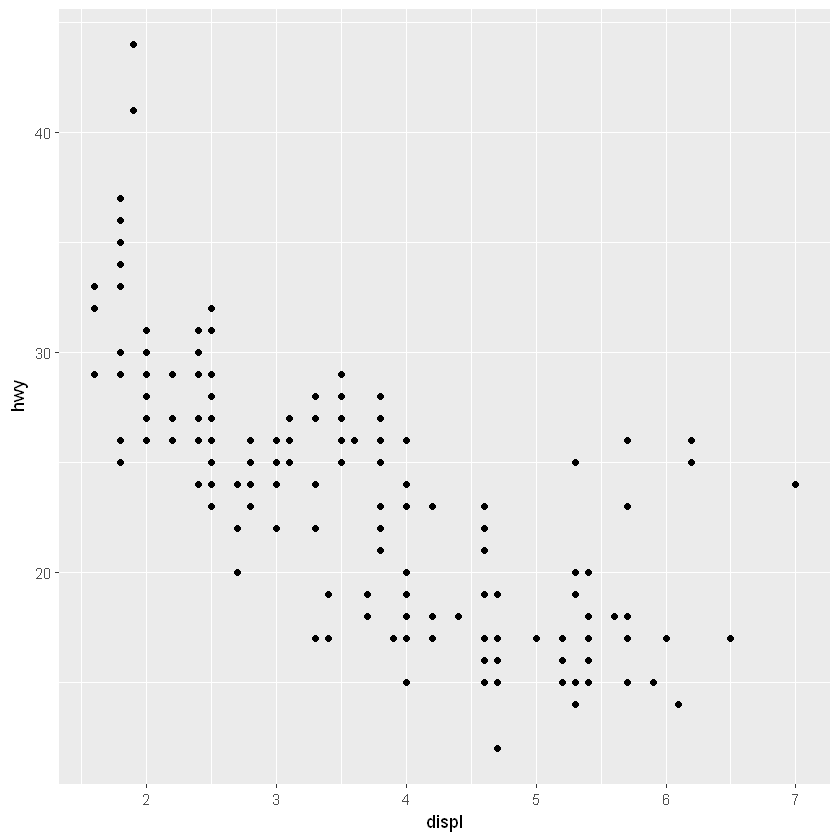

In [9]:
qplot(displ,hwy,data=mpg)

### Modifying aesthetics

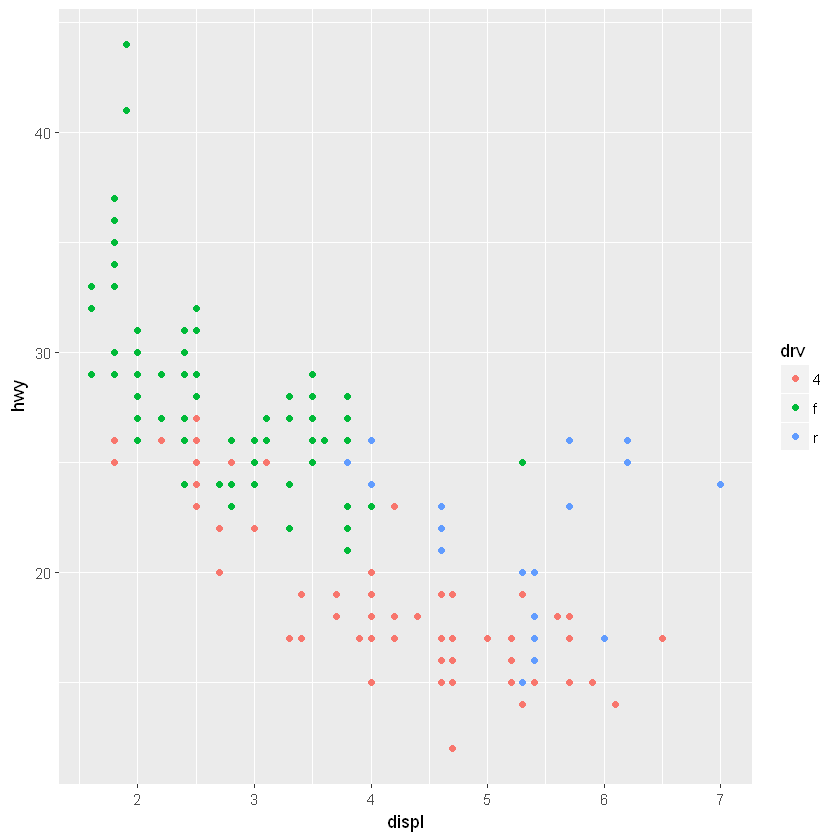

In [10]:
qplot(displ,hwy,data=mpg,color=drv)

### Adding a geom

`geom_smooth()` using method = 'loess'


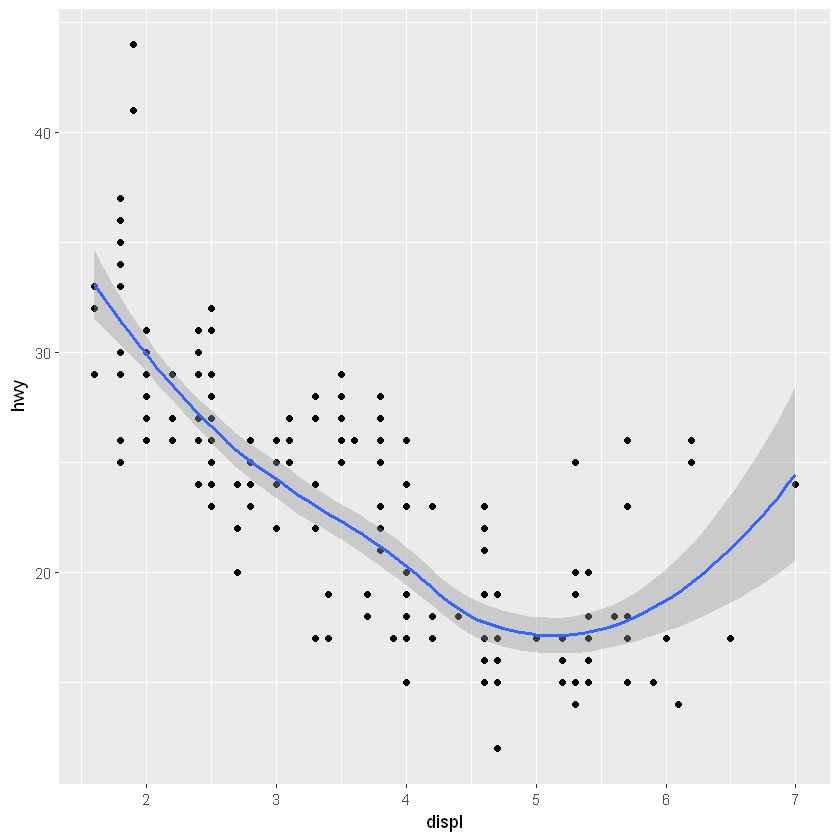

In [11]:
qplot(displ,hwy,data=mpg,geom = c("point","smooth"))

### Histograms

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


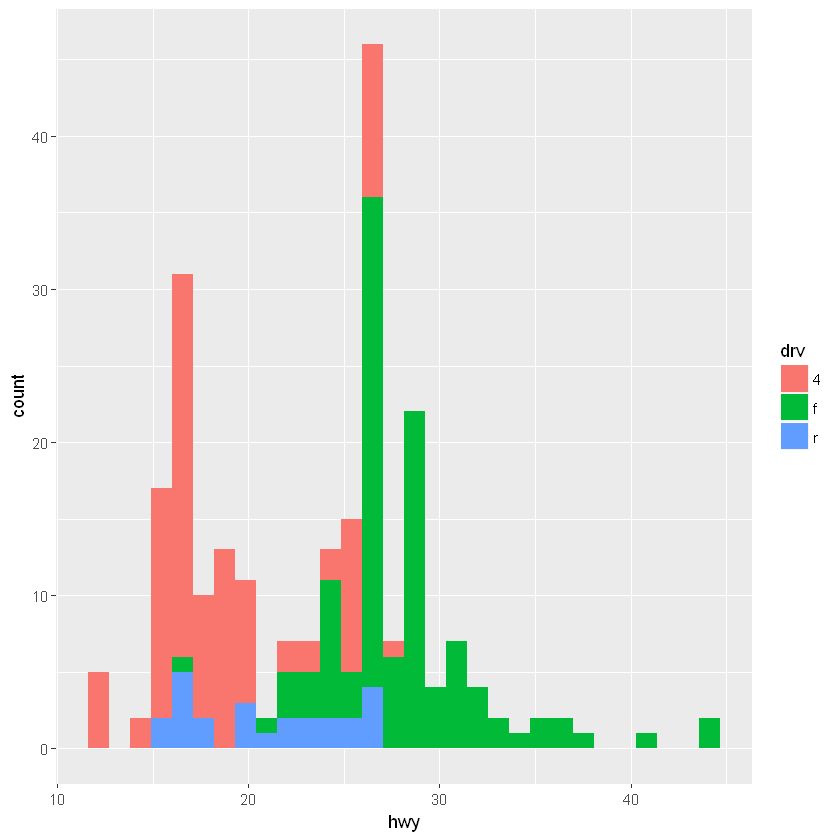

In [12]:
qplot(hwy,data=mpg,fill=drv)

### Facets

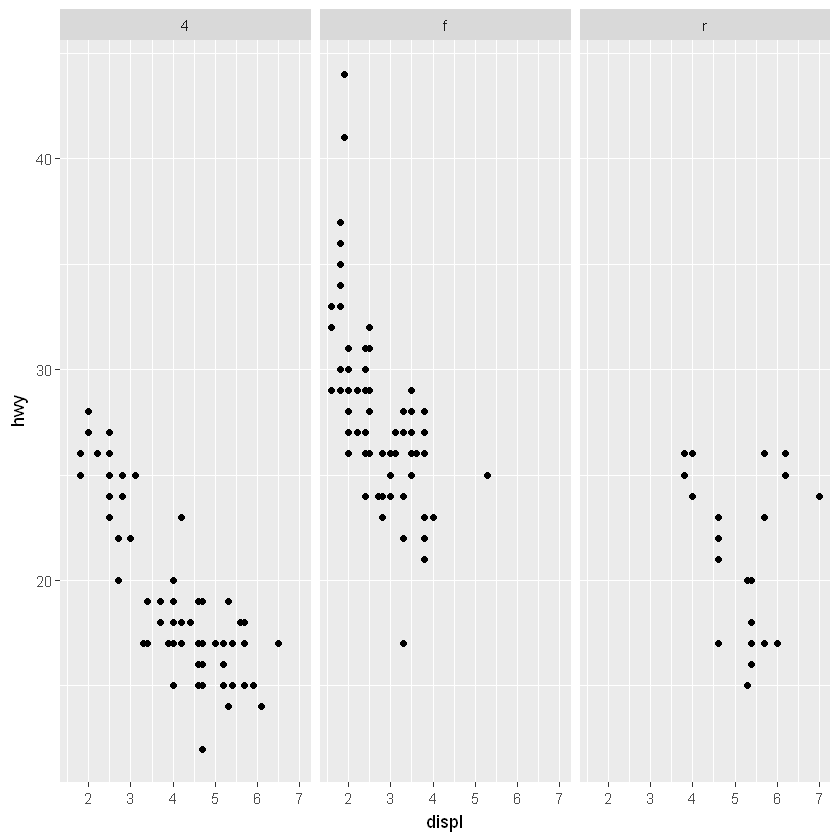

In [13]:
qplot(displ,hwy,data=mpg,facets=.~drv)

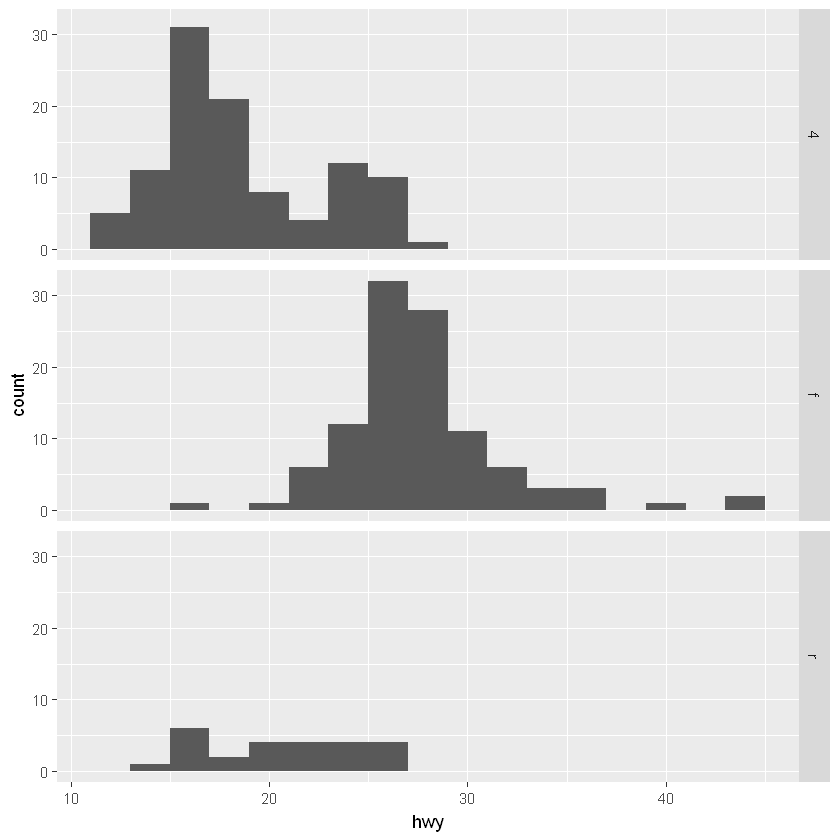

In [14]:
qplot(hwy,data=mpg,facets=drv ~.,binwidth=2)

### Example: MAACS

In [15]:
load('maacs.Rda')

In [16]:
str(maacs)

'data.frame':	750 obs. of  9 variables:
 $ id            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ eno           : num  141 124 126 164 99 68 41 50 12 30 ...
 $ duBedMusM     : num  2423 2793 3055 775 1634 ...
 $ pm25          : num  15.6 34.4 39 33.2 27.1 ...
 $ mopos         : Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ logpm25       : num  1.19 1.54 1.59 1.52 1.43 ...
 $ NocturnalSympt: int  0 0 2 2 2 2 0 1 0 0 ...
 $ bmicat        : Factor w/ 2 levels "normal weight",..: 1 2 2 1 1 1 2 2 2 1 ...
 $ logno2_new    : num  1.62 1.88 1.71 1.46 1.29 ...


#### Historam of eno

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 108 rows containing non-finite values (stat_bin)."

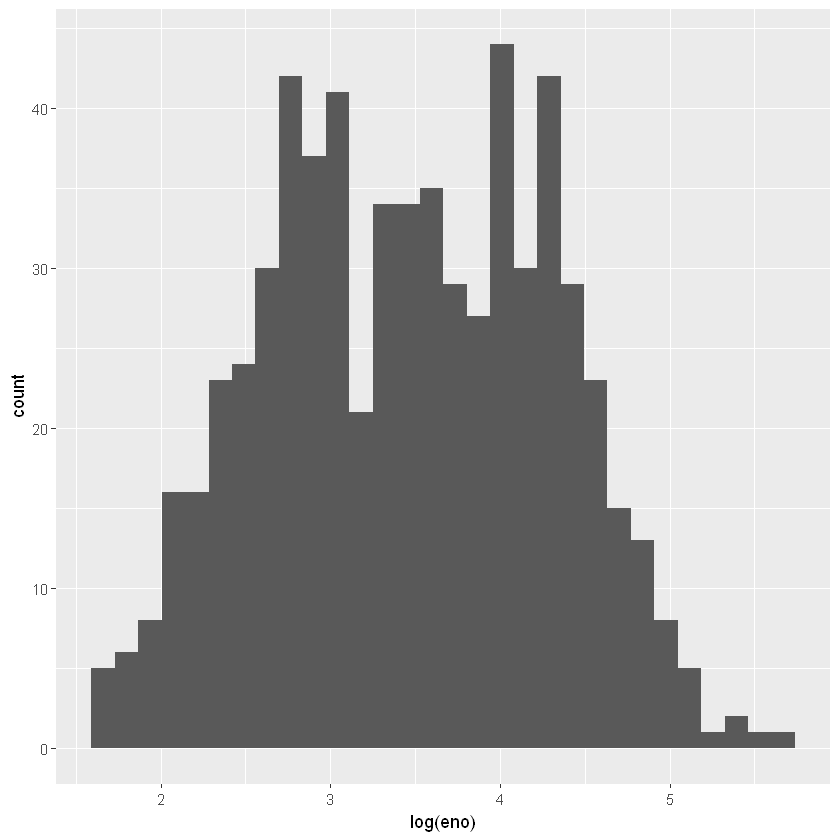

In [17]:
qplot(log(eno),data=maacs)

#### Histogram By Group

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 108 rows containing non-finite values (stat_bin)."

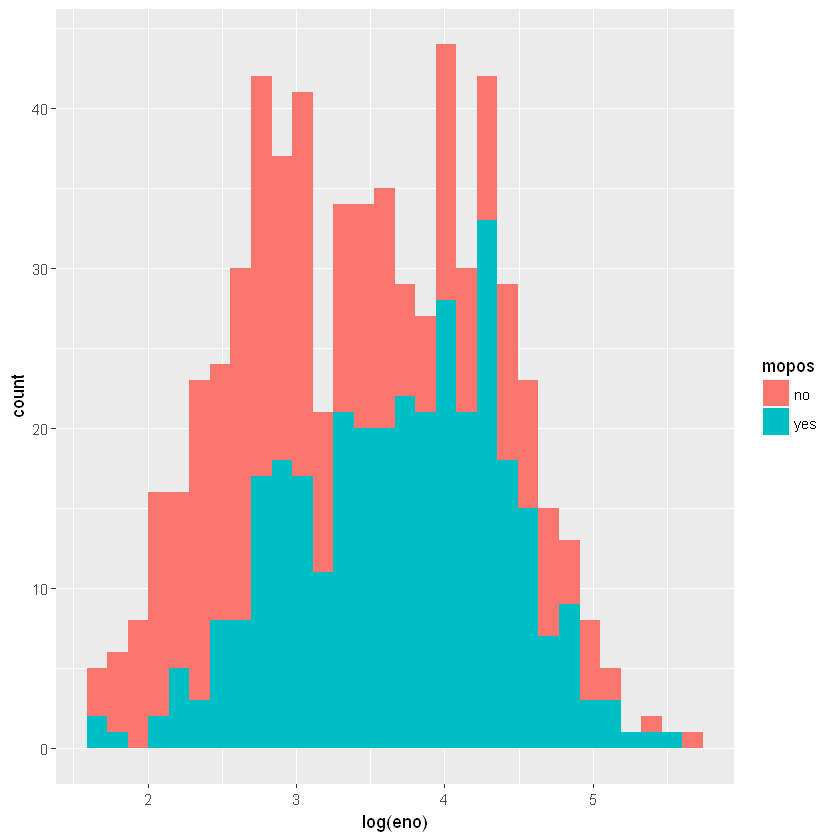

In [18]:
qplot(log(eno),data=maacs,fill=mopos)

#### Density Smooth

Warning message:
"Removed 108 rows containing non-finite values (stat_density)."

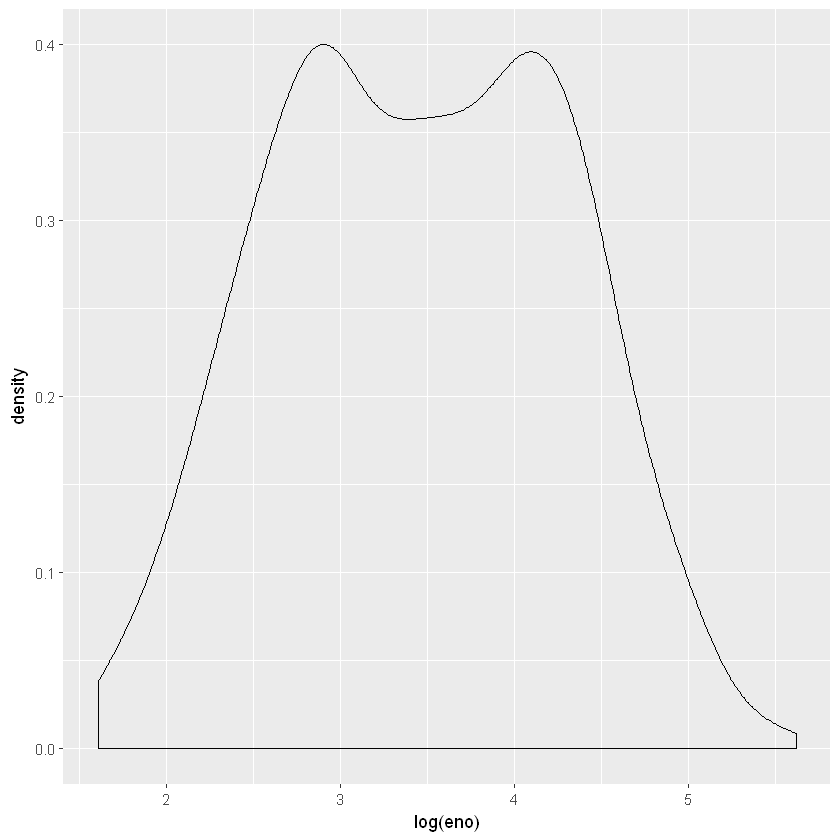

In [19]:
qplot(log(eno),data=maacs,geom = "density")

Warning message:
"Removed 108 rows containing non-finite values (stat_density)."

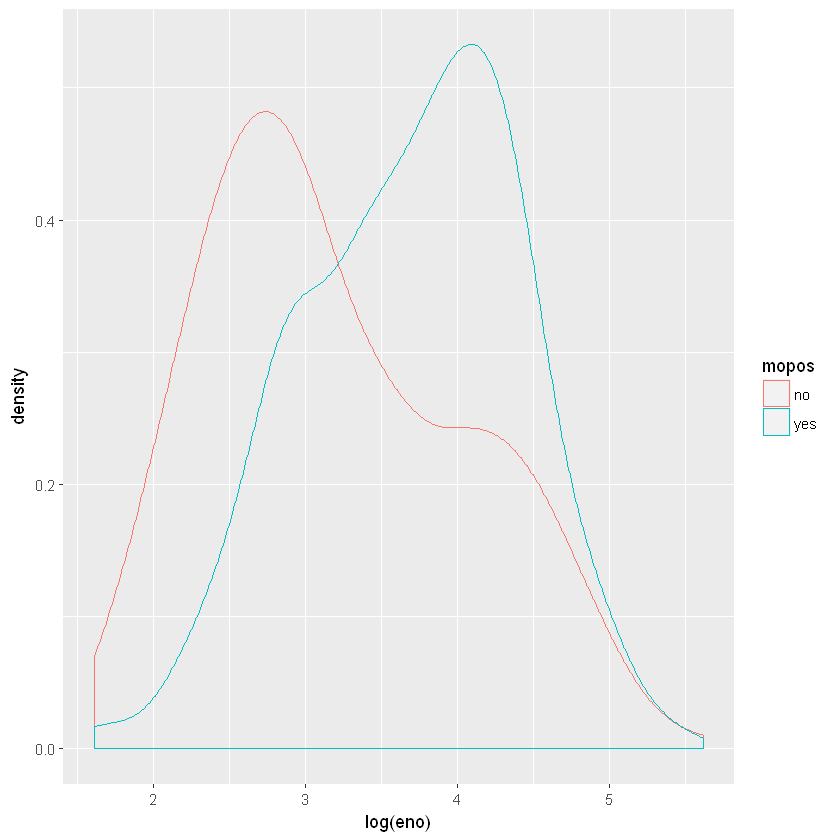

In [20]:
qplot(log(eno),data=maacs,geom = "density",color=mopos)

#### Scatter Plots eno vs PM2.5

Warning message:
"Removed 184 rows containing missing values (geom_point)."

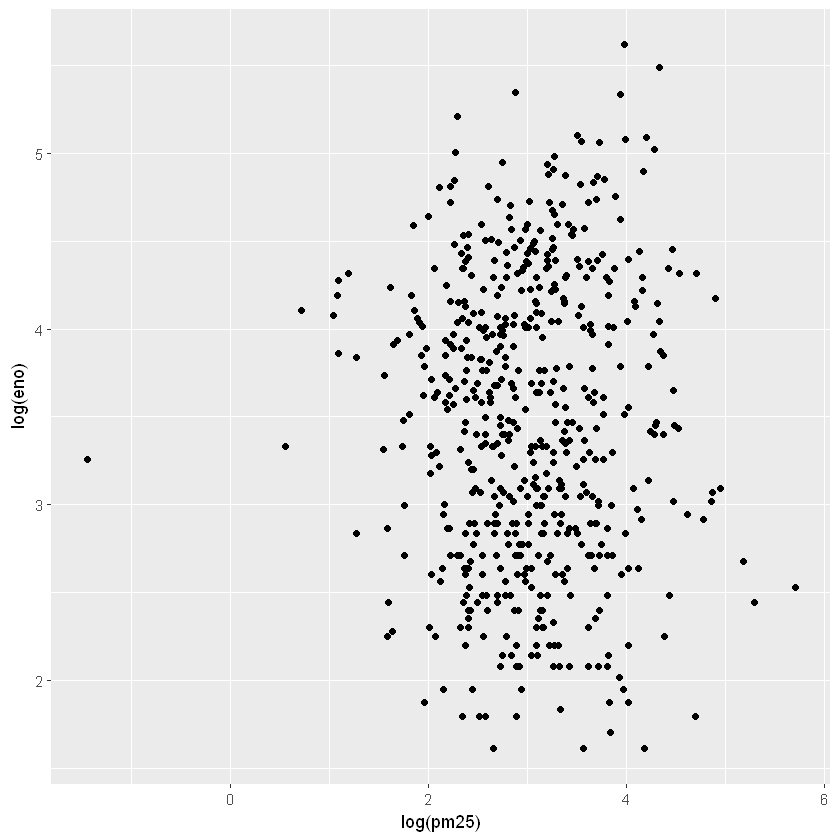

In [21]:
qplot(log(pm25),log(eno),data=maacs)

Warning message:
"Removed 184 rows containing missing values (geom_point)."

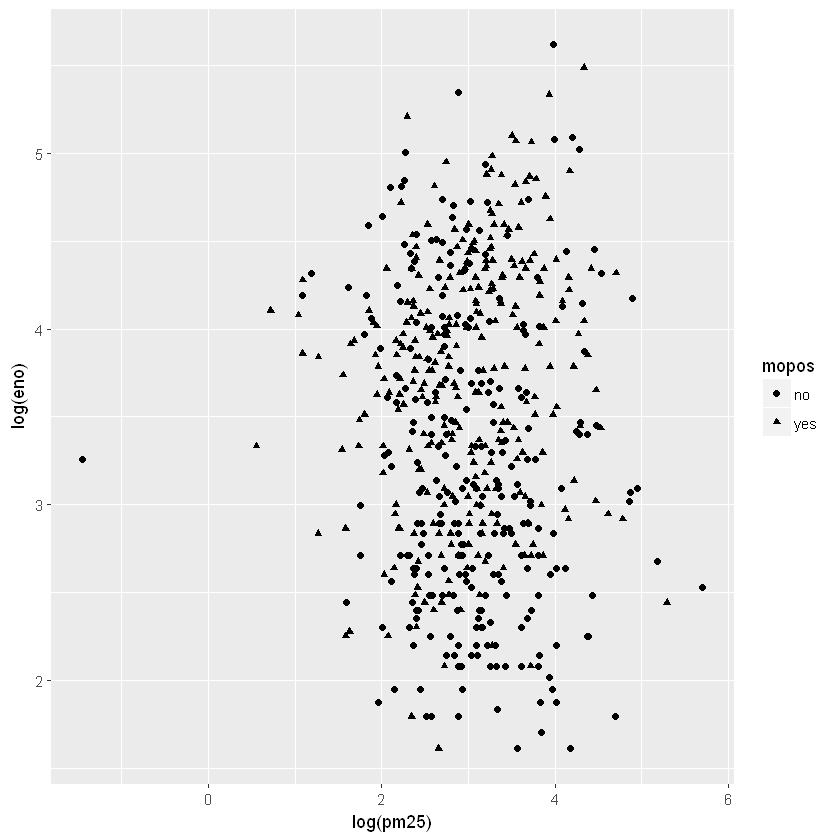

In [22]:
qplot(log(pm25),log(eno),data=maacs,shape=mopos)

Warning message:
"Removed 184 rows containing missing values (geom_point)."

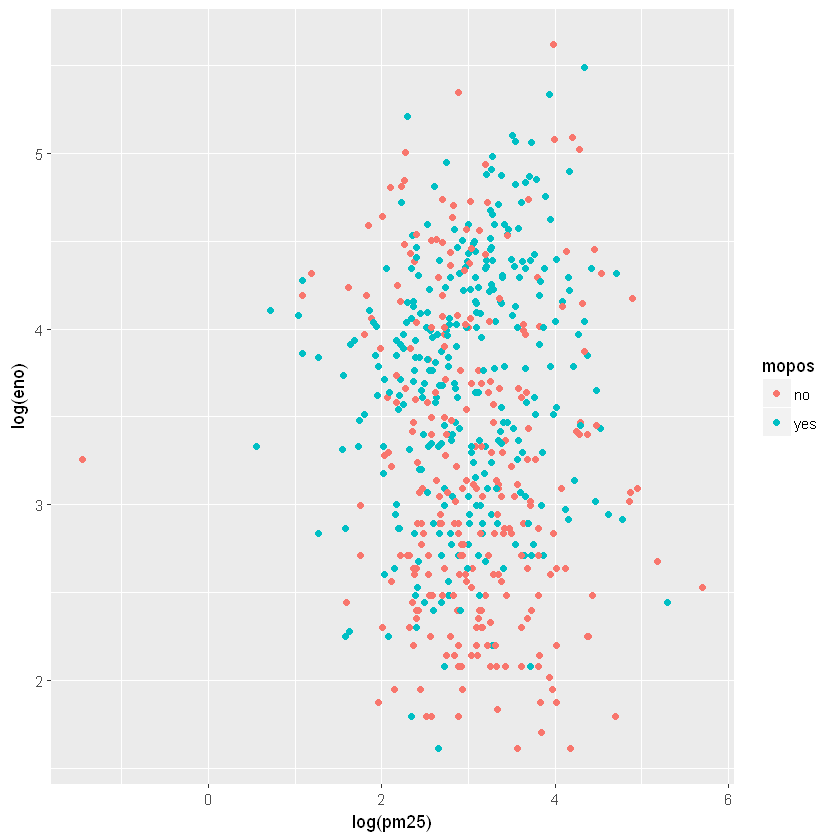

In [23]:
qplot(log(pm25),log(eno),data=maacs,color=mopos)

Warning message:
"Removed 184 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 184 rows containing missing values (geom_point)."

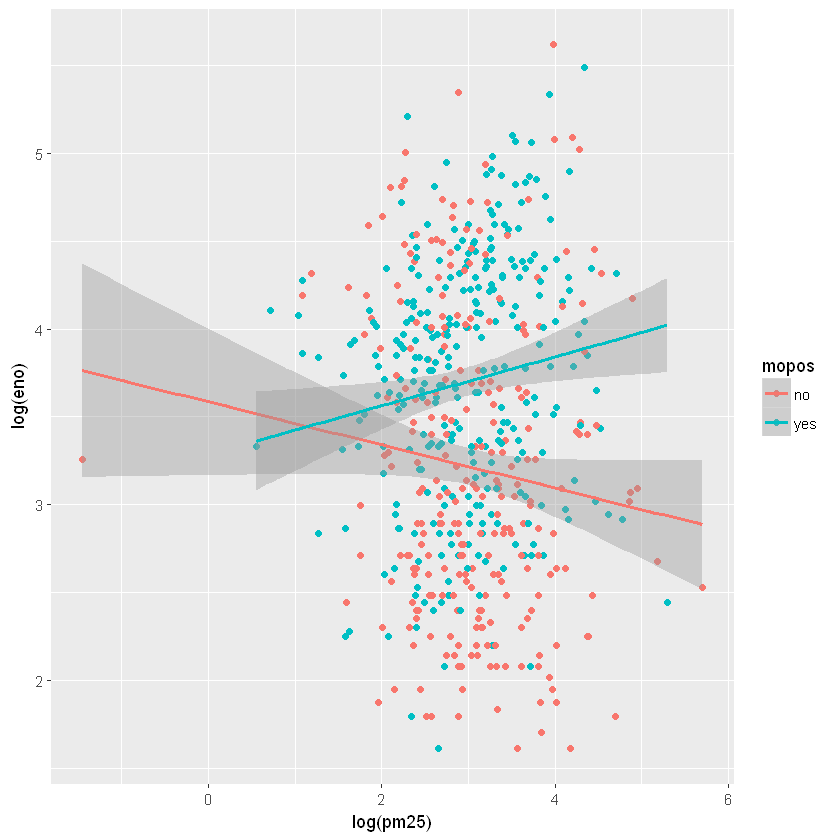

In [24]:
qplot(log(pm25),log(eno),data=maacs,color=mopos)+geom_smooth(method = "lm")

Warning message:
"Removed 184 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 184 rows containing missing values (geom_point)."

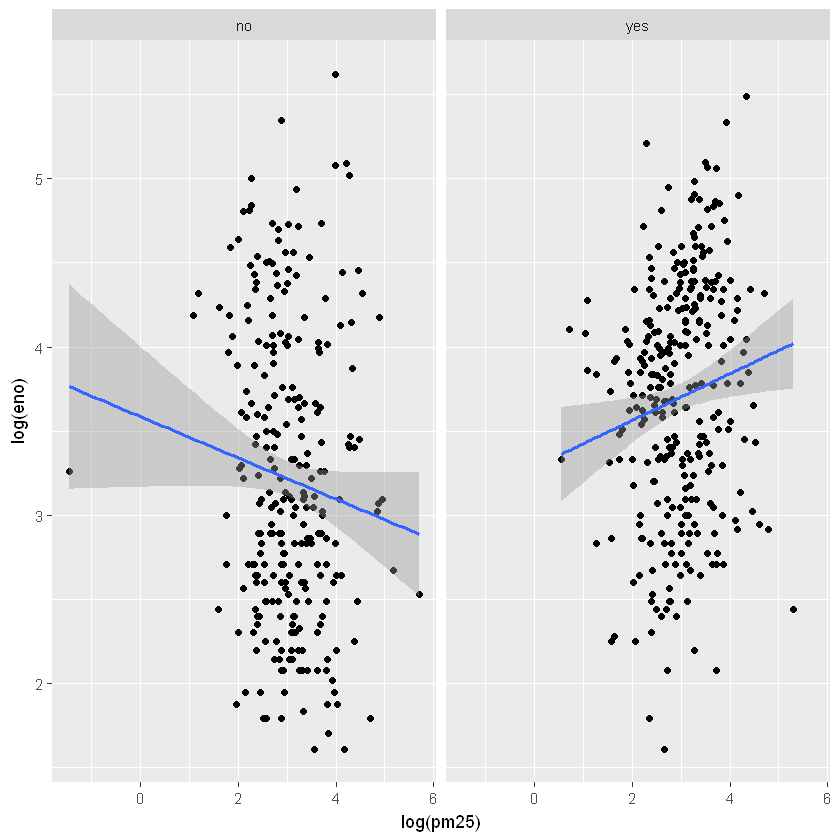

In [25]:
qplot(log(pm25),log(eno),data=maacs,facets = .~mopos)+geom_smooth(method="lm")

### Basic Plot

Warning message:
"Ignoring unknown parameters: method"Warning message:
"Removed 134 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 134 rows containing missing values (geom_point)."

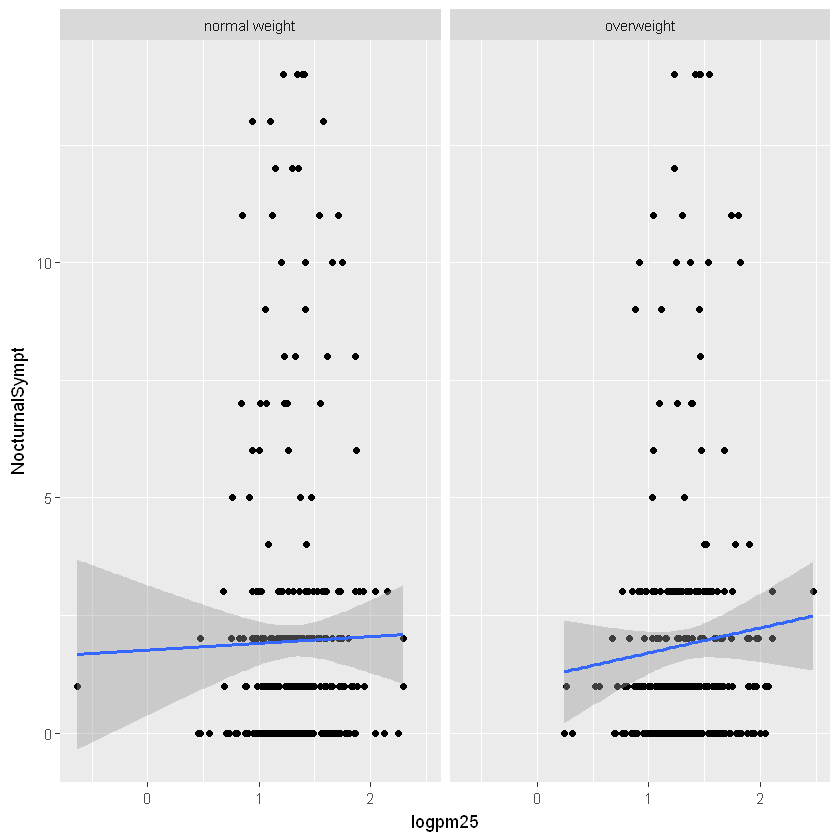

In [27]:
qplot(logpm25,NocturnalSympt,data=maacs,facets = .~bmicat,geom=c("point","smooth"),
      method="lm")

### Building uo in layers

In [30]:
head(maacs)

id,eno,duBedMusM,pm25,mopos,logpm25,NocturnalSympt,bmicat,logno2_new
1,141,2423,15.560,yes,1.192010,0,normal weight,1.617849
2,124,2793,34.370,yes,1.536180,0,overweight,1.884490
3,126,3055,38.953,yes,1.590541,2,overweight,1.712953
4,164,775,33.249,yes,1.521779,2,normal weight,1.458879
5,99,1634,27.060,yes,1.432328,2,normal weight,1.294510
6,68,939,18.890,yes,1.276232,2,normal weight,1.468377


In [31]:
g <- ggplot(maacs,aes(logpm25,NocturnalSympt))

In [32]:
summary(g)

data: id, eno, duBedMusM, pm25, mopos, logpm25, NocturnalSympt, bmicat,
  logno2_new [750x9]
mapping:  x = logpm25, y = NocturnalSympt
faceting: <ggproto object: Class FacetNull, Facet>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map: function
    map_data: function
    params: list
    render_back: function
    render_front: function
    render_panels: function
    setup_data: function
    setup_params: function
    shrink: TRUE
    train: function
    train_positions: function
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetNull, Facet>


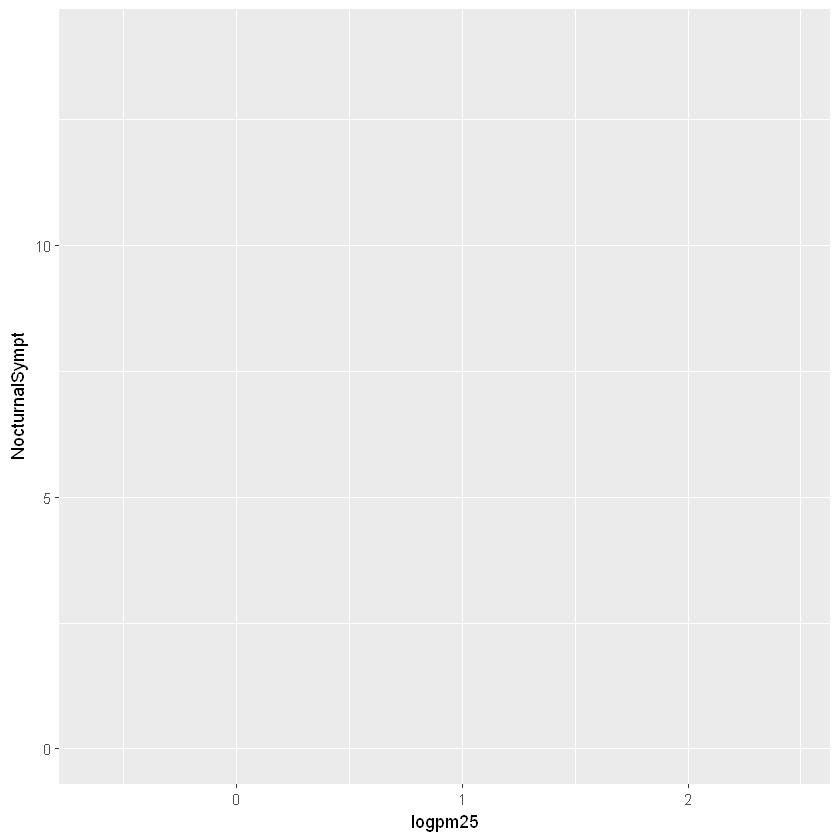

In [33]:
print(g)

Warning message:
"Removed 134 rows containing missing values (geom_point)."

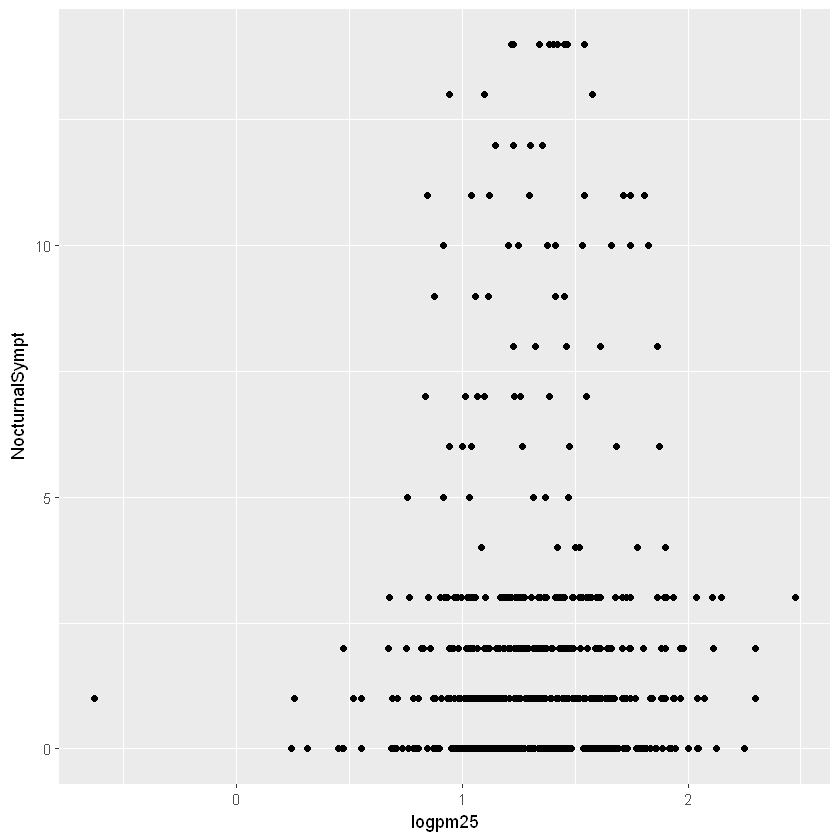

In [34]:
p <- g +geom_point()
print(p)

### Adding layers Smooth

`geom_smooth()` using method = 'loess'
Warning message:
"Removed 134 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 134 rows containing missing values (geom_point)."

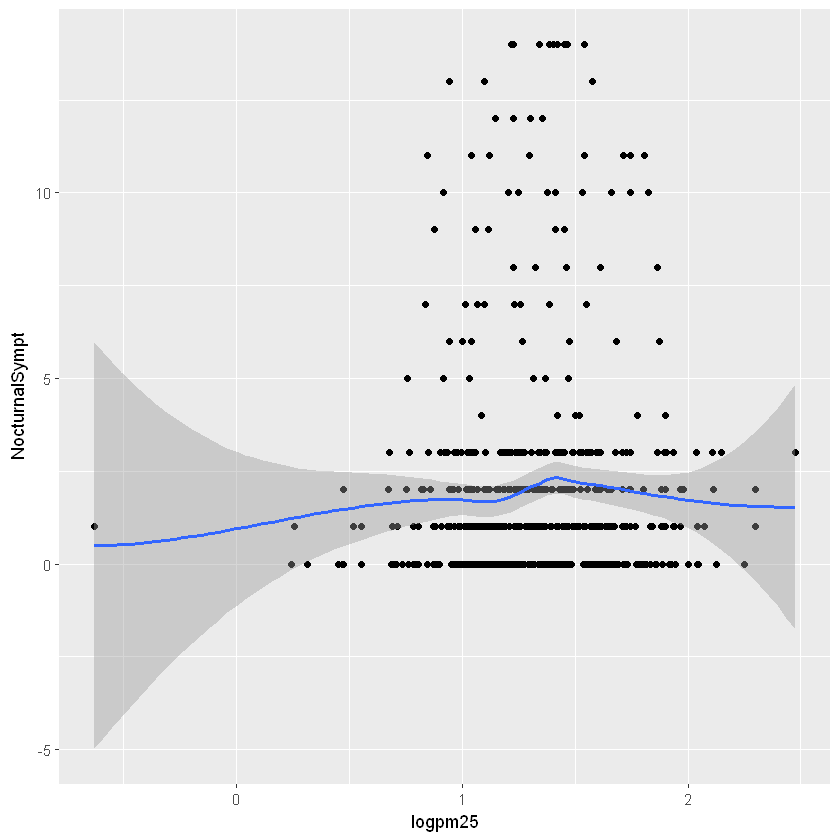

In [35]:
g + geom_point() +geom_smooth()

Warning message:
"Removed 134 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 134 rows containing missing values (geom_point)."

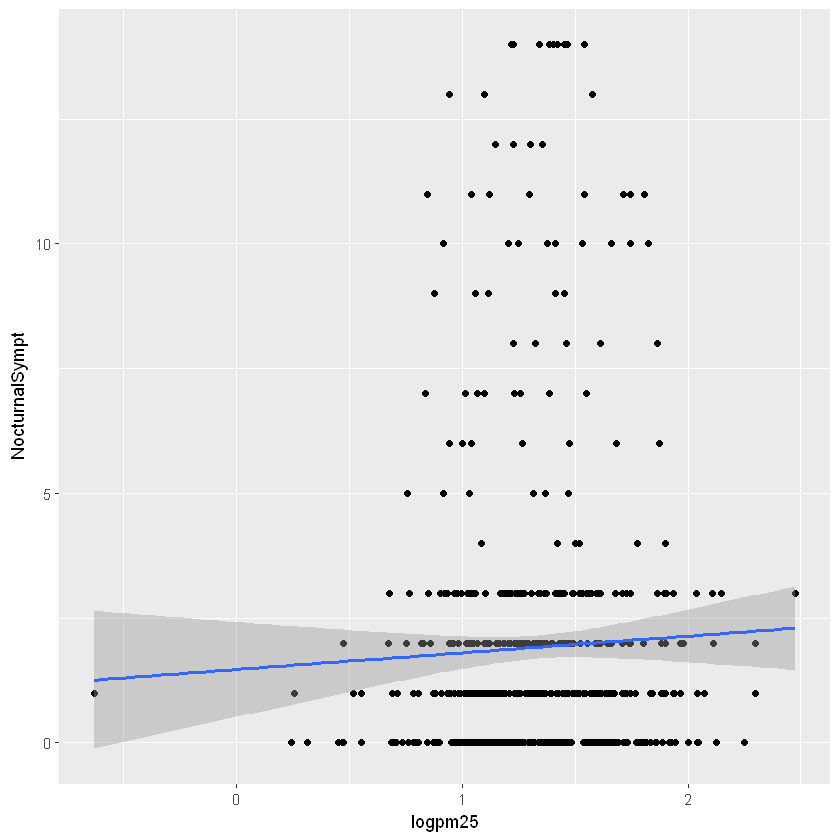

In [36]:
g + geom_point() +geom_smooth(method="lm")

### Adding more layers: Facets

Warning message:
"Removed 134 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 134 rows containing missing values (geom_point)."

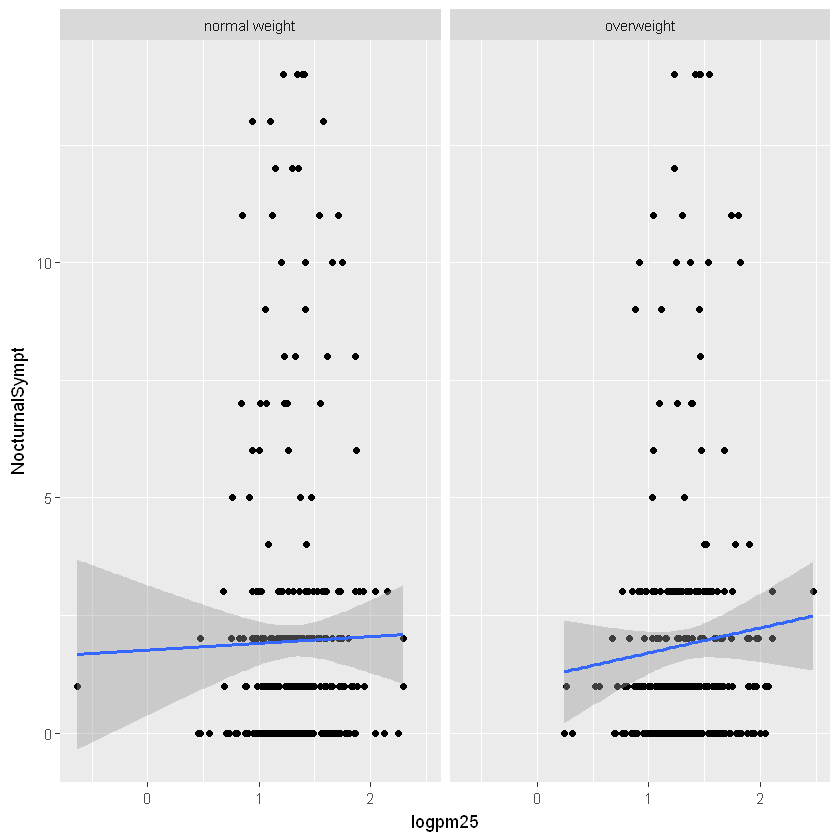

In [37]:
g +geom_point() + facet_grid(.~bmicat)+geom_smooth(method="lm")

### Modifying Aesthetics

Warning message:
"Removed 134 rows containing missing values (geom_point)."

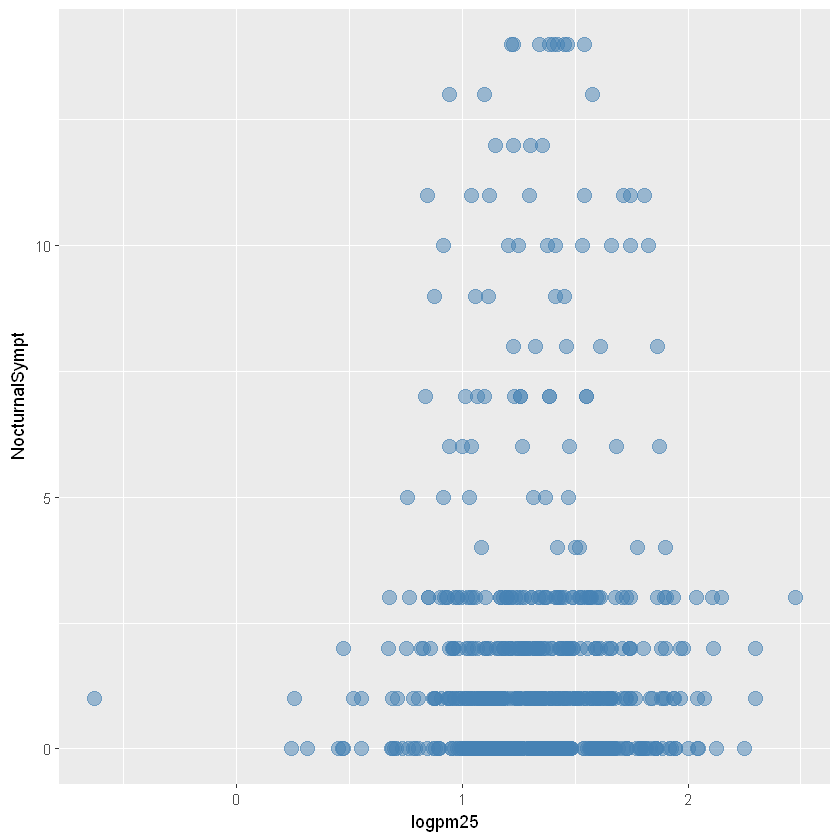

In [38]:
g + geom_point(color="steelblue",size=4,alpha=1/2)

Warning message:
"Removed 134 rows containing missing values (geom_point)."

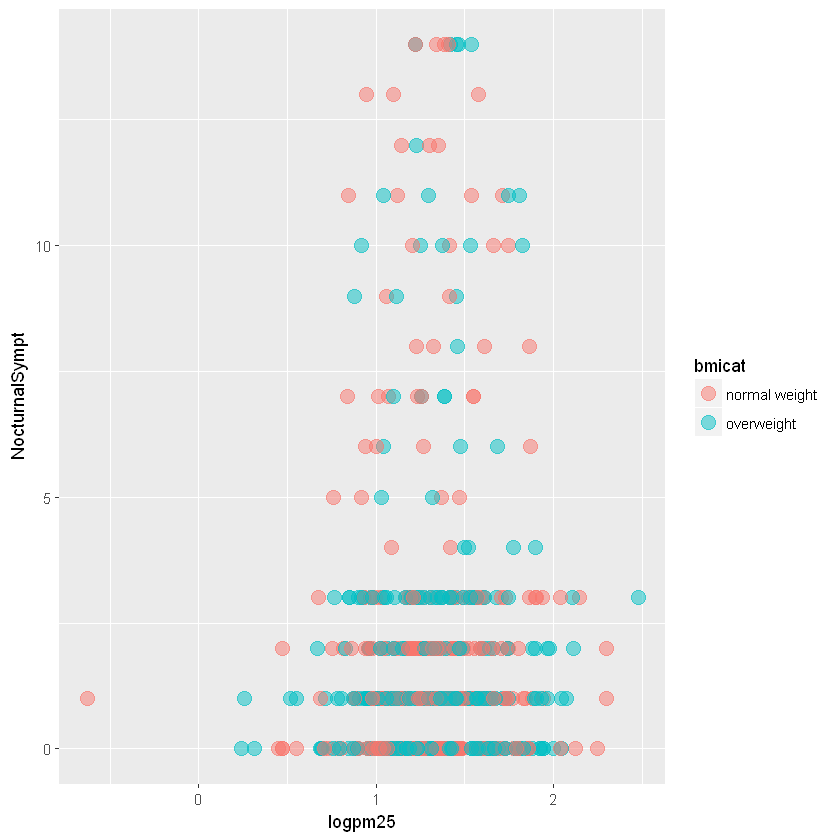

In [39]:
g + geom_point(aes(color=bmicat),size=4,alpha=1/2)

### Modifying labels

Warning message:
"Removed 134 rows containing missing values (geom_point)."

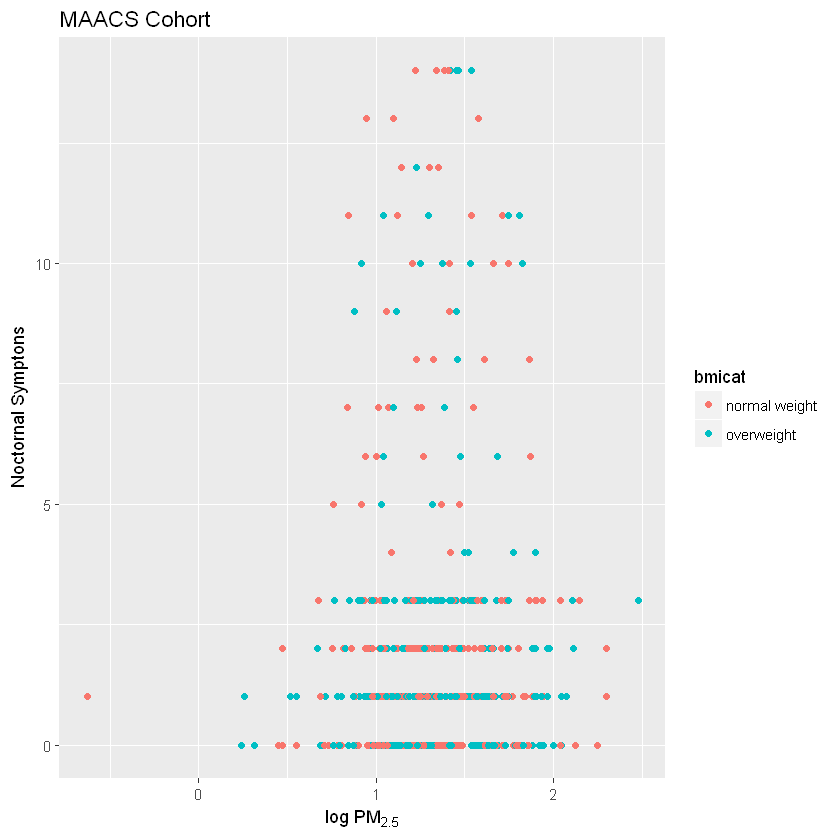

In [40]:
g + geom_point(aes(color=bmicat)) + labs(title="MAACS Cohort") + 
labs(x=expression("log "*PM[2.5]),y="Noctornal Symptons")

### Cutomizing the Smooth

Warning message:
"Removed 134 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 134 rows containing missing values (geom_point)."

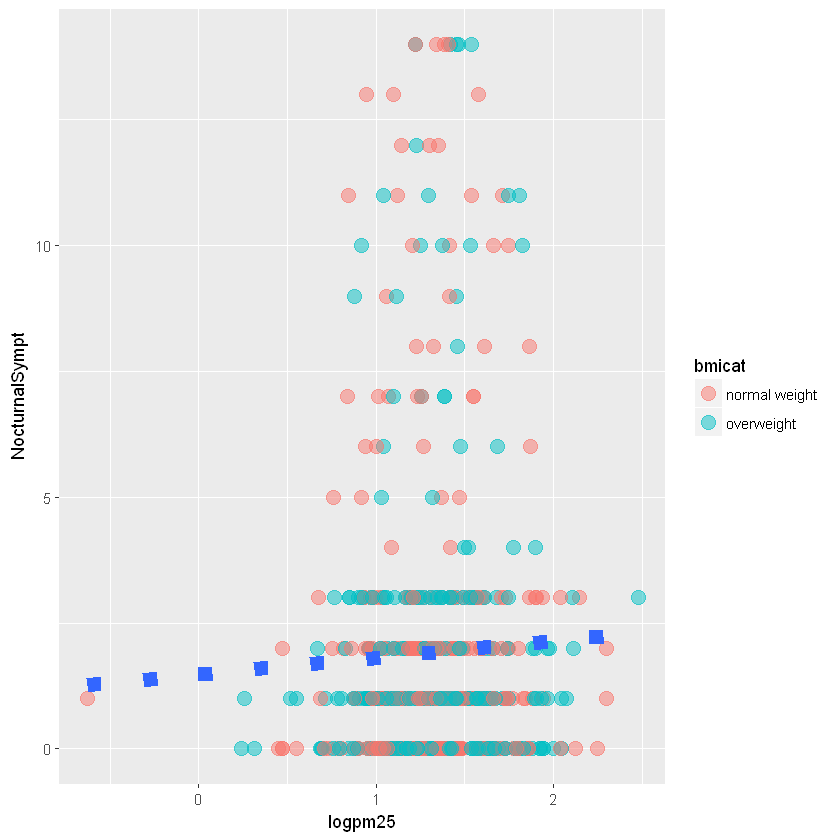

In [42]:
g + geom_point(aes(color=bmicat),size=4,alpha=1/2)+ geom_smooth(size=4,linetype=3,
                                                               method="lm",se=FALSE)

Warning message:
"Removed 134 rows containing missing values (geom_point)."Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message

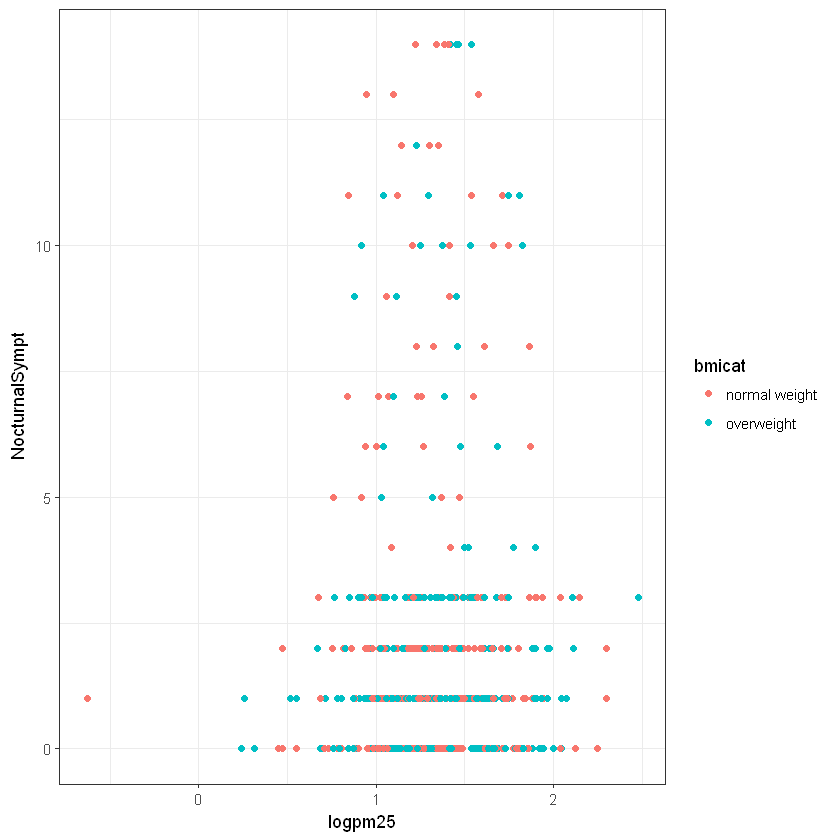

In [43]:
g + geom_point(aes(color=bmicat))+ theme_bw(base_family = "Times")

### A Note about axis limits

In [44]:
testdata <- data.frame(x=1:100,y=rnorm(100))
testdata[50,2] <- 100

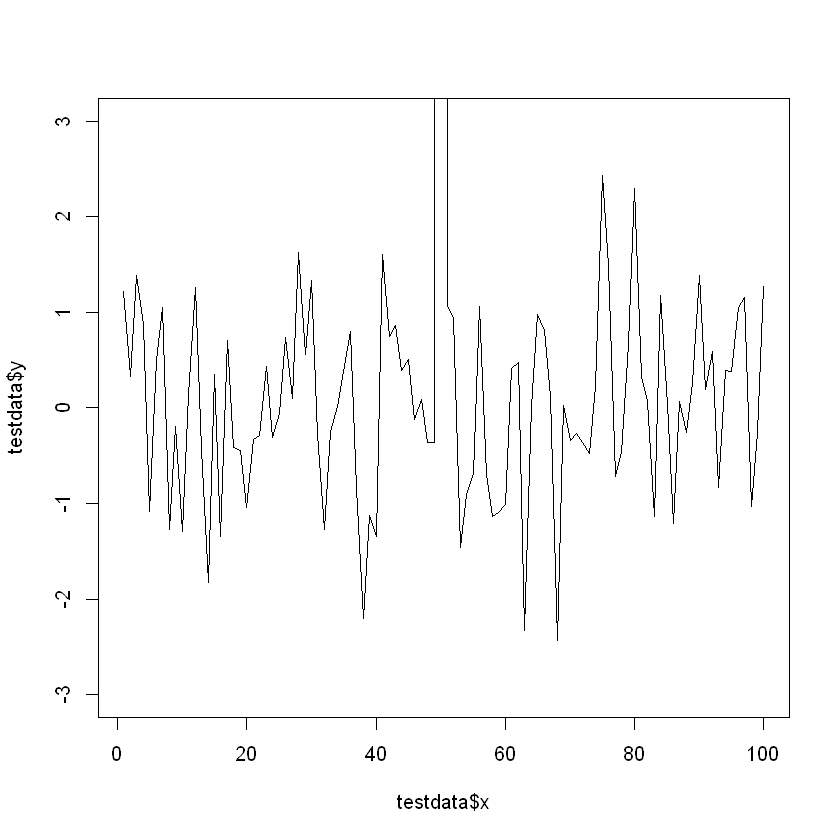

In [50]:
plot(testdata$x,testdata$y,type="l",ylim=c(-3,3))

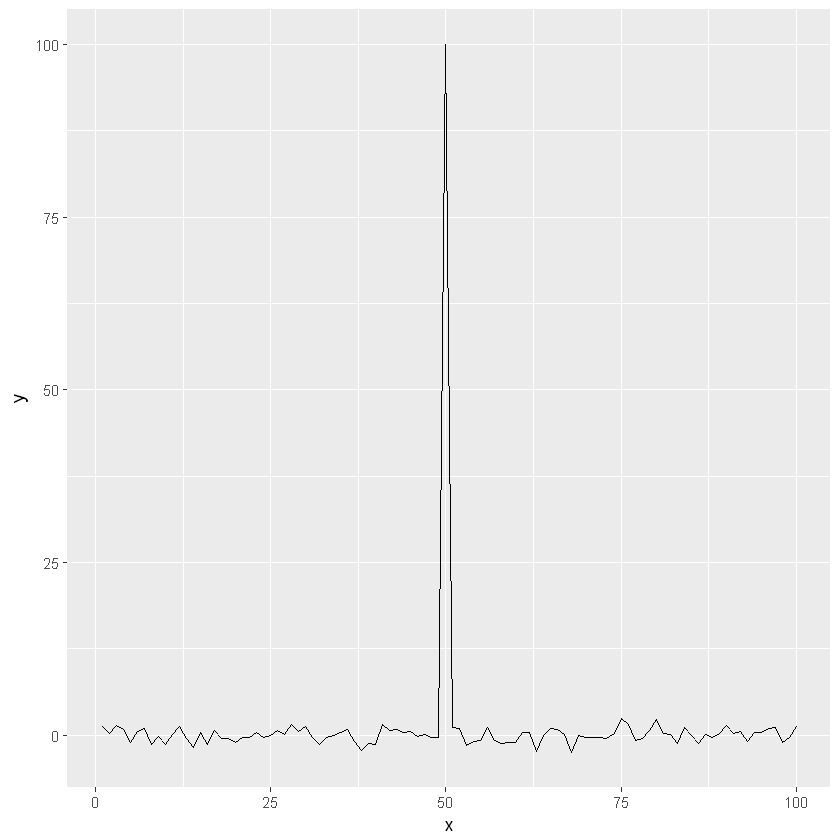

In [51]:
g <- ggplot(testdata,aes(x=x,y=y))
g+geom_line()

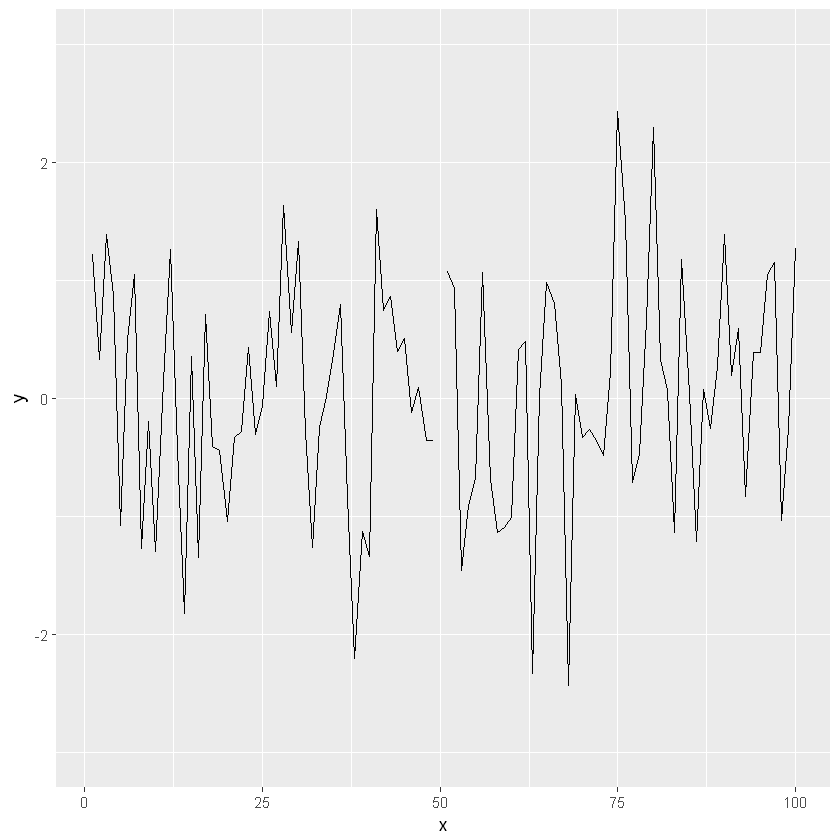

In [52]:
g+geom_line() +ylim(-3,3)

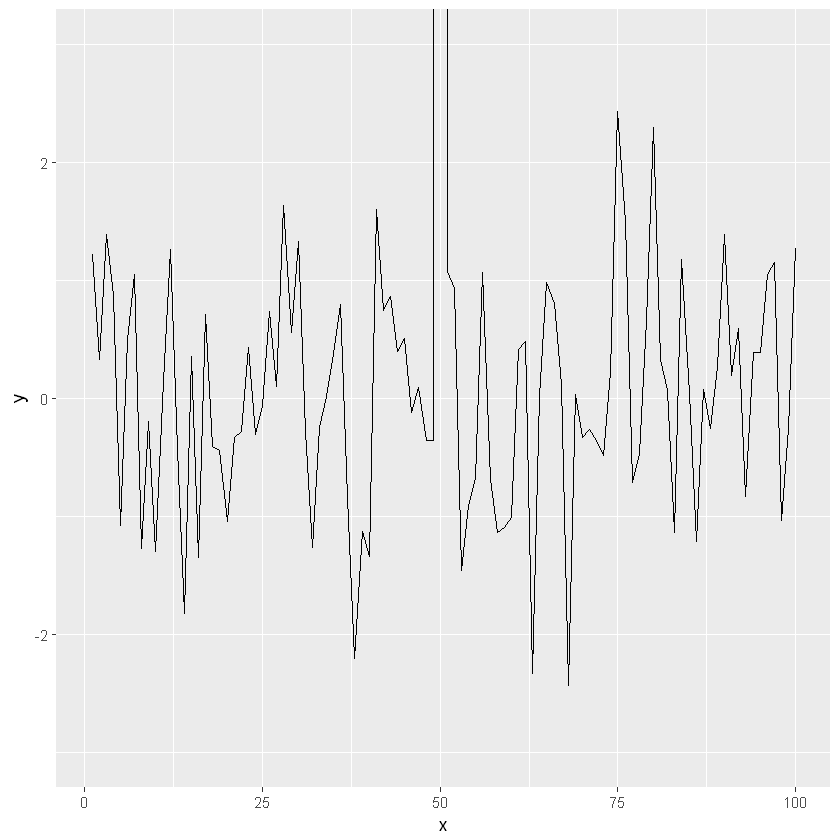

In [54]:
g+geom_line()+coord_cartesian(ylim=c(-3,3))

### Making No2 Tertiles

In [55]:
cutpoints <- quantile(maacs$logno2_new,seq(0,1,length=4),na.rm=TRUE)

In [56]:
maacs$no2dec <- cut(maacs$logno2_new,cutpoints)

In [57]:
levels(maacs$no2dec)

[1] "(-0.629,1.18]" "(1.18,1.44]"   "(1.44,2.48]"

### Code for Final Plot

In [59]:
g <- ggplot(maacs,aes(logpm25,NocturnalSympt))

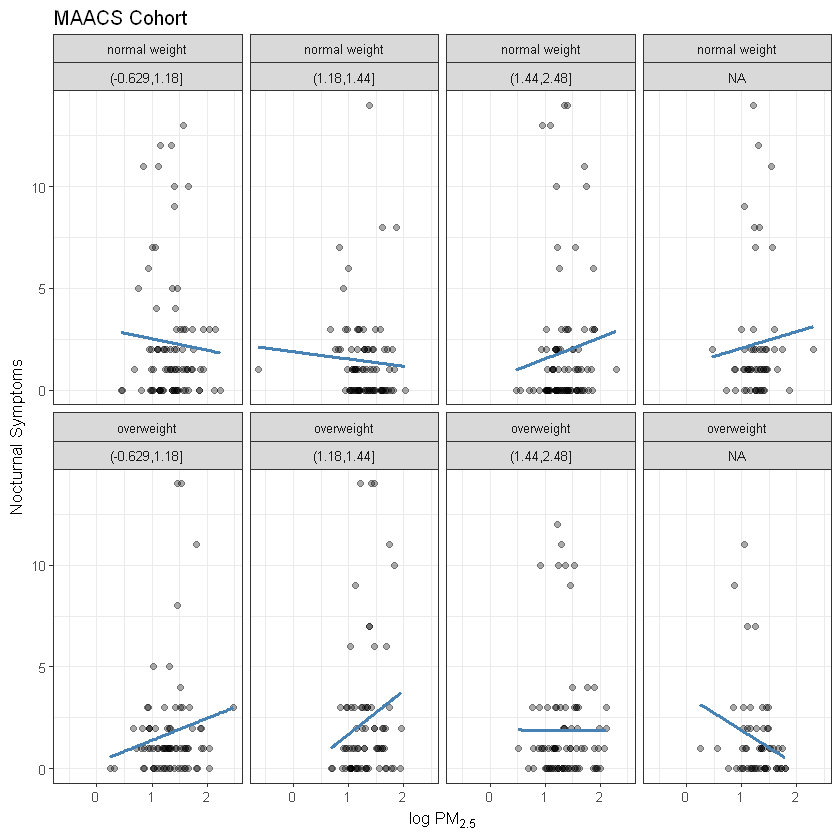

In [88]:
g + geom_point(alpha = 1/3)+ 
facet_wrap(bmicat ~ no2dec, nrow = 2, ncol = 4) +
geom_smooth(method="lm", se=FALSE, col="steelblue") + 
theme_bw(base_family = "Avenir", base_size = 10) +
labs(x = expression("log " * PM[2.5]))  +
labs(y = "Nocturnal Symptoms") + 
labs(title = "MAACS Cohort")